<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Web-scraping-with-BeautifulSoup" data-toc-modified-id="Web-scraping-with-BeautifulSoup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Web scraping with BeautifulSoup</a></span></li><li><span><a href="#The-webpage-and-data" data-toc-modified-id="The-webpage-and-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The webpage and data</a></span></li><li><span><a href="#Histogram-of-ratings" data-toc-modified-id="Histogram-of-ratings-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Histogram of ratings</a></span></li><li><span><a href="#The-most-popular-companies" data-toc-modified-id="The-most-popular-companies-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>The most popular companies</a></span><ul class="toc-item"><li><span><a href="#Average-Ratings" data-toc-modified-id="Average-Ratings-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Average Ratings</a></span></li><li><span><a href="#10-Most-popular-companies" data-toc-modified-id="10-Most-popular-companies-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>10 Most popular companies</a></span></li><li><span><a href="#Effect-of-cocoa-content-on-ratings" data-toc-modified-id="Effect-of-cocoa-content-on-ratings-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Effect of cocoa content on ratings</a></span></li></ul></li></ul></div>

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Web scraping with BeautifulSoup

BeautifulSoup is a powerful web scraping tool that can be used to extract elements of a webpage using Python.

We first connect to the webpage, and then parse the html of the webpage using BeautifulSoup. This will create a BeautifulSoup object that can be interacted with in Python to collect the desired data using elements of the html such as tags and classes.

# The webpage and data

The webpage used in this project was provided by Codecademy.com. It's a simple webpage that contains a table of data for chocolate bars. There are around 1800 entries in the table.

Below is a snip of the content of the html. This was obtained by navigating to the webpage url, right-clicking the webpage and selecting `inspect` (in a Chrome browser).

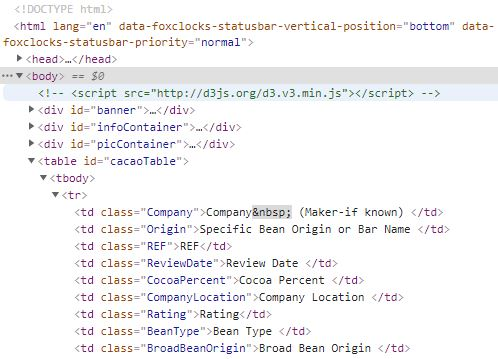

In [3]:
# make a request for the HTML from the site:
webpage_content = requests.get('https://content.codecademy.com/courses/beautifulsoup/cacao/index.html')

In [4]:
# get the content of the site
webpage = webpage_content.content

In [5]:
# create a BeautifulSoup object:
soup = BeautifulSoup(webpage, 'html.parser')

# Histogram of ratings

To create the histogram, we need to access the part of the html that contains the chocolate bar ratings.

In [6]:
# accessing the Rating class:
soup_ratings = soup.find_all(attrs={'class':'Rating'})

In [7]:
ratings = []
# the first element in the Rating class is the table header (i.e. it is "Rating"), so we start at index 1
for rating in soup_ratings[1:]:
    ratings.append(float(rating.get_text())) # have to convert the ratings to float

In [9]:
ratings[:10]

[3.75, 2.75, 3.0, 3.5, 3.5, 2.75, 3.5, 3.5, 3.75, 4.0]

In [10]:
len(ratings)

1795

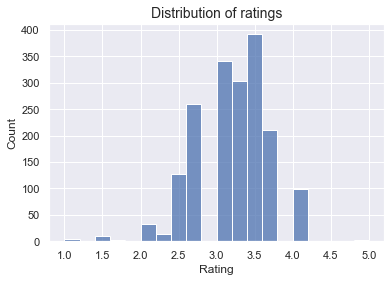

In [13]:
sns.set(style='darkgrid')

sns.histplot(ratings, bins=20).set_title('Distribution of ratings', fontsize=14)
plt.xlabel('Rating')
plt.show()
plt.close()

# The most popular companies

In [17]:
# select all of the companies via the "Company" class
company_names = soup.select('.Company')

# check the name of the first company
company_names[1].get_text

<bound method Tag.get_text of <td class="Company">A. Morin</td>>

In [19]:
# as with the ratings, collect all of the company names from the webpage

list_of_companies = []
for name in company_names[1:]:
    list_of_companies.append(name.get_text())
    
list_of_companies[:10]

['A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin']

In [20]:
len(list_of_companies)

1795

Create a DataFrame with one column for the companies, and another for their ratings

In [21]:
chocolatier_ratings = pd.DataFrame({'Company':list_of_companies, 'Rating':ratings})

In [23]:
chocolatier_ratings.head()

,Company,Rating
0,A. Morin,3.75
1,A. Morin,2.75
2,A. Morin,3.00
3,A. Morin,3.50
4,A. Morin,3.50


## Average Ratings

In [24]:
chocolatiers_avg_rating = chocolatier_ratings.groupby('Company').Rating.mean().reset_index()

In [25]:
chocolatiers_avg_rating

,Company,Rating
0,A. Morin,3.380435
1,AMMA,3.500000
2,Acalli,3.750000
3,Adi,3.250000
4,Aequare (Gianduja),2.875000
...,...,...
411,hello cocoa,3.125000
412,hexx,3.050000
413,iQ Chocolate,2.875000
414,organicfair,2.850000


## 10 Most popular companies

In [26]:
top_10_chocolatiers = chocolatiers_avg_rating.nlargest(10, 'Rating')
top_10_chocolatiers

,Company,Rating
380,Tobago Estate (Pralus),4.000000
183,Heirloom Cacao Preservation (Zokoko),3.875000
287,Ocelot,3.875000
14,Amedei,3.846154
249,Matale,3.812500
304,Patric,3.791667
191,Idilio (Felchlin),3.775000
2,Acalli,3.750000
82,Chocola'te,3.750000
96,Christopher Morel (Felchlin),3.750000


In [27]:
cocoa_content = soup.select('.CocoaPercent')

## Effect of cocoa content on ratings

In [29]:
cocoa_content[1]

<td class="CocoaPercent">63%</td>

In [30]:
# creating a list of all of the different cocoa percentages

cocoa_percent = []
for content in cocoa_content[1:]:
    cocoa_percent.append(float(content.get_text().strip('%')))

In [31]:
cocoa_percent[:5]

[63.0, 70.0, 70.0, 70.0, 70.0]

In [32]:
# add these percentages to the DataFrame in a new column:
chocolatier_ratings['CocoaPercentage'] = cocoa_percent

In [33]:
chocolatier_ratings.head()

,Company,Rating,CocoaPercentage
0,A. Morin,3.75,63.0
1,A. Morin,2.75,70.0
2,A. Morin,3.00,70.0
3,A. Morin,3.50,70.0
4,A. Morin,3.50,70.0


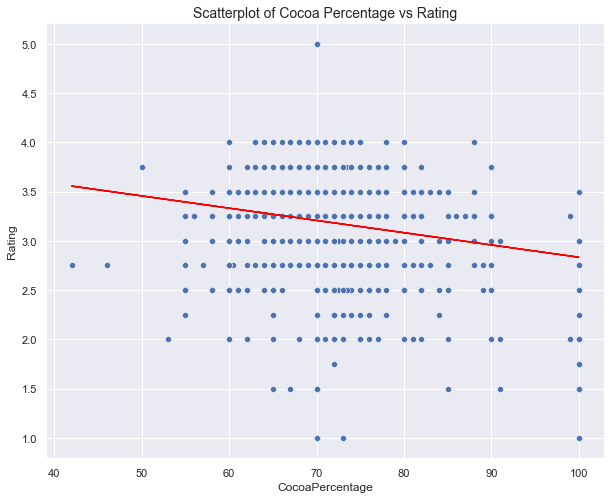

In [41]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=chocolatier_ratings.CocoaPercentage, y=chocolatier_ratings.Rating).\
                set_title('Scatterplot of Cocoa Percentage vs Rating', fontsize=14)

# adding a regresion line to the plot:
z = np.polyfit(chocolatier_ratings.CocoaPercentage, chocolatier_ratings.Rating, 1)
line_function = np.poly1d(z)
plt.plot(chocolatier_ratings.CocoaPercentage, line_function(chocolatier_ratings.CocoaPercentage), color="red")
plt.show()